In [1]:
# Import libraries. You may or may not use all of these.
#!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2022-10-18 20:45:37.040378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 20:45:37.088689: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-18 20:45:37.104099: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 20:45:37.437229: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
# Import data
#!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
dataset["sex"] = pd.factorize(dataset["sex"])[0]
dataset["region"] = pd.factorize(dataset["region"])[0]
dataset["smoker"] = pd.factorize(dataset["smoker"])[0]
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [5]:
test_dataset = dataset.sample(frac=0.2)
train = dataset[~dataset.isin(test_dataset)].dropna()
print(len(train), '\n',train.head())
len(test_dataset)

1070 
     age  sex   bmi  children  smoker  region  expenses
1  18.0  1.0  33.8       1.0     1.0     1.0   1725.55
2  28.0  1.0  33.0       3.0     1.0     1.0   4449.46
4  32.0  1.0  28.9       0.0     1.0     2.0   3866.86
6  46.0  0.0  33.4       1.0     1.0     1.0   8240.59
8  37.0  1.0  29.8       2.0     1.0     3.0   6406.41


268

In [6]:
train_labels = train.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [7]:
# Create normalized data layer
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train))
# Create model
model = keras.Sequential([
                          normalizer,
                          layers.Dense(2),
                          layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae', 'mse'])

model.summary()


2022-10-18 20:45:37.855118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 20:45:37.871583: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 20:45:37.871670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 2)                 14        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 30
Trainable params: 17
Non-trainable params: 13
_________________________________________________________________


2022-10-18 20:45:37.872414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 20:45:37.872918: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 20:45:37.872988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 20:45:37.873031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA

In [8]:
model.fit(train, train_labels, epochs=100, validation_split=0.2)

/home/dheereshantony/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
27/27 [==============================] - 1s 4ms/step - loss: 13530.4209 - mae: 13530.4209 - mse: 332990400.0000 - val_loss: 13857.0039 - val_mae: 13857.0039 - val_mse: 349620480.0000
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 13487.8398 - mae: 13487.8398 - mse: 331893664.0000 - val_loss: 13785.3857 - val_mae: 13785.3857 - val_mse: 347671040.0000
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 13381.6787 - mae: 13381.6787 - mse: 329041184.0000 - val_loss: 13644.3477 - val_mae: 13644.3477 - val_mse: 343877984.0000
Epoch 4/100
 1/27 [>.............................] - ETA: 0s - loss: 11031.0098 - mae: 11031.0098 - mse: 220782688.0000

2022-10-18 20:45:38.984265: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


27/27 [==============================] - 0s 2ms/step - loss: 13197.5762 - mae: 13197.5762 - mse: 324367328.0000 - val_loss: 13424.4717 - val_mae: 13424.4717 - val_mse: 338107968.0000
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 12930.2549 - mae: 12930.2549 - mse: 317374304.0000 - val_loss: 13121.8516 - val_mae: 13121.8516 - val_mse: 330250944.0000
Epoch 6/100
27/27 [==============================] - 0s 1ms/step - loss: 12580.3037 - mae: 12580.3037 - mse: 308648480.0000 - val_loss: 12742.0137 - val_mae: 12742.0137 - val_mse: 320496544.0000
Epoch 7/100
27/27 [==============================] - 0s 1ms/step - loss: 12159.8193 - mae: 12159.8193 - mse: 297907104.0000 - val_loss: 12298.5664 - val_mae: 12298.5664 - val_mse: 308456512.0000
Epoch 8/100
27/27 [==============================] - 0s 1ms/step - loss: 11671.6523 - mae: 11671.6523 - mse: 284514848.0000 - val_loss: 11775.7686 - val_mae: 11775.7686 - val_mse: 294282560.0000
Epoch 9/100
27/27 [==================

Epoch 47/100
27/27 [==============================] - 0s 1ms/step - loss: 3623.1538 - mae: 3623.1538 - mse: 43818364.0000 - val_loss: 3774.7717 - val_mae: 3774.7717 - val_mse: 44384740.0000
Epoch 48/100
27/27 [==============================] - 0s 1ms/step - loss: 3614.6245 - mae: 3614.6245 - mse: 43629832.0000 - val_loss: 3763.0681 - val_mae: 3763.0681 - val_mse: 44275976.0000
Epoch 49/100
27/27 [==============================] - 0s 1ms/step - loss: 3605.3542 - mae: 3605.3542 - mse: 43821464.0000 - val_loss: 3756.8501 - val_mae: 3756.8501 - val_mse: 44112560.0000
Epoch 50/100
27/27 [==============================] - 0s 1ms/step - loss: 3605.2520 - mae: 3605.2520 - mse: 43585932.0000 - val_loss: 3753.3718 - val_mae: 3753.3718 - val_mse: 44185704.0000
Epoch 51/100
27/27 [==============================] - 0s 1ms/step - loss: 3590.9360 - mae: 3590.9360 - mse: 43994164.0000 - val_loss: 3740.5562 - val_mae: 3740.5562 - val_mse: 44286824.0000
Epoch 52/100
27/27 [==============================

27/27 [==============================] - 0s 1ms/step - loss: 3509.9783 - mae: 3509.9783 - mse: 52037696.0000 - val_loss: 3655.7397 - val_mae: 3655.7397 - val_mse: 51078416.0000
Epoch 91/100
27/27 [==============================] - 0s 1ms/step - loss: 3510.8215 - mae: 3510.8215 - mse: 51597260.0000 - val_loss: 3659.4578 - val_mae: 3659.4578 - val_mse: 50524792.0000
Epoch 92/100
27/27 [==============================] - 0s 1ms/step - loss: 3508.2639 - mae: 3508.2639 - mse: 51502168.0000 - val_loss: 3654.9526 - val_mae: 3654.9526 - val_mse: 50686908.0000
Epoch 93/100
27/27 [==============================] - 0s 1ms/step - loss: 3509.5859 - mae: 3509.5859 - mse: 51459240.0000 - val_loss: 3655.9163 - val_mae: 3655.9163 - val_mse: 50538916.0000
Epoch 94/100
27/27 [==============================] - 0s 1ms/step - loss: 3509.8130 - mae: 3509.8130 - mse: 51608596.0000 - val_loss: 3660.8821 - val_mae: 3660.8821 - val_mse: 50802100.0000
Epoch 95/100
27/27 [==============================] - 0s 1ms/st

9/9 - 0s - loss: 2917.6782 - mae: 2917.6782 - mse: 37145104.0000 - 14ms/epoch - 2ms/step
Testing set Mean Abs Error: 2917.68 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 465us/step


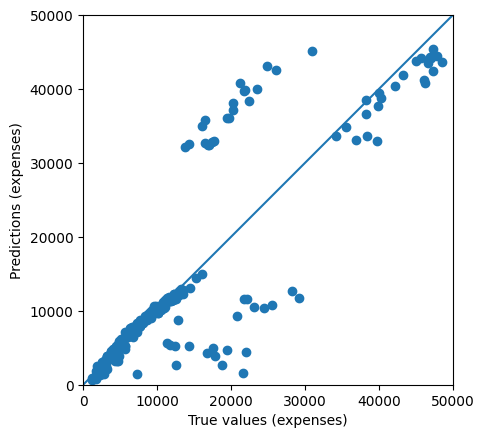

In [9]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
